# Import Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Preview Dataset

In [31]:
df = pd.read_csv("heart.csv")

df.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
696,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
697,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0


# Check Dataset Dimensions

In [32]:
df.shape

(698, 14)

# Check Missing Values

In [33]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Dataset Information Summary

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       698 non-null    int64  
 1   sex       698 non-null    int64  
 2   cp        698 non-null    int64  
 3   trestbps  698 non-null    int64  
 4   chol      698 non-null    int64  
 5   fbs       698 non-null    int64  
 6   restecg   698 non-null    int64  
 7   thalach   698 non-null    int64  
 8   exang     698 non-null    int64  
 9   oldpeak   698 non-null    float64
 10  slope     698 non-null    int64  
 11  ca        698 non-null    int64  
 12  thal      698 non-null    int64  
 13  target    698 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 76.5 KB


# Statistical Summary

In [35]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,698.00000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,54.30086,0.681948,0.975645,132.322350,248.277937,0.156160,0.502865,149.703438,0.330946,1.077077,1.385387,0.763610,2.302292,0.517192
std,9.27693,0.466054,1.019597,18.070183,54.276777,0.363268,0.525524,23.247086,0.470891,1.200880,0.621623,1.049695,0.616856,0.500063
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.00000,1.000000,1.000000,130.000000,243.000000,0.000000,0.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,282.000000,0.000000,1.000000,168.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Count of Target Classes

In [36]:
df["target"].value_counts()

target
1    361
0    337
Name: count, dtype: int64

# Age Distribution Histogram

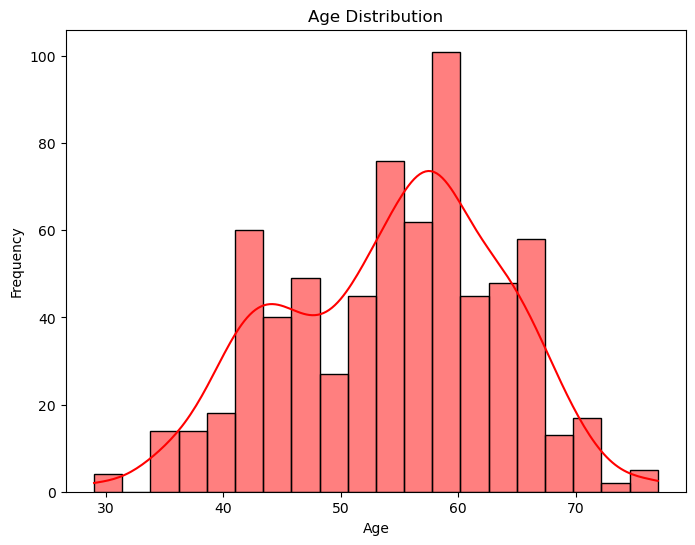

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Heart Disease Count by Sex

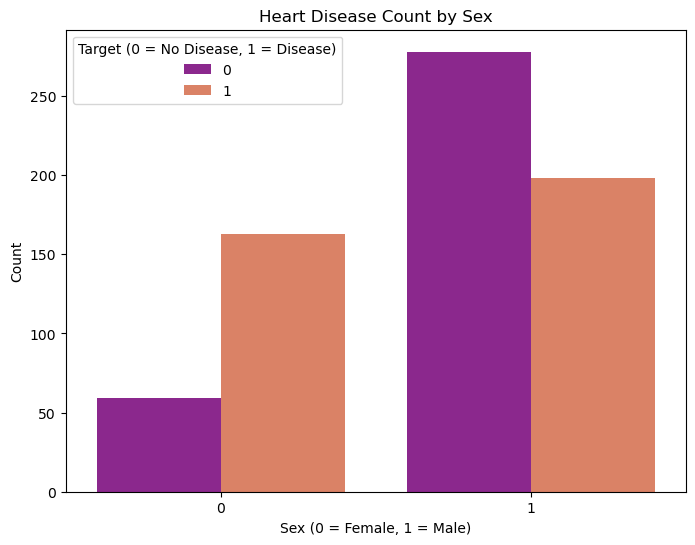

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=df, palette='plasma')
plt.title('Heart Disease Count by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Target (0 = No Disease, 1 = Disease)')
plt.show()

# Correlation Heatmap

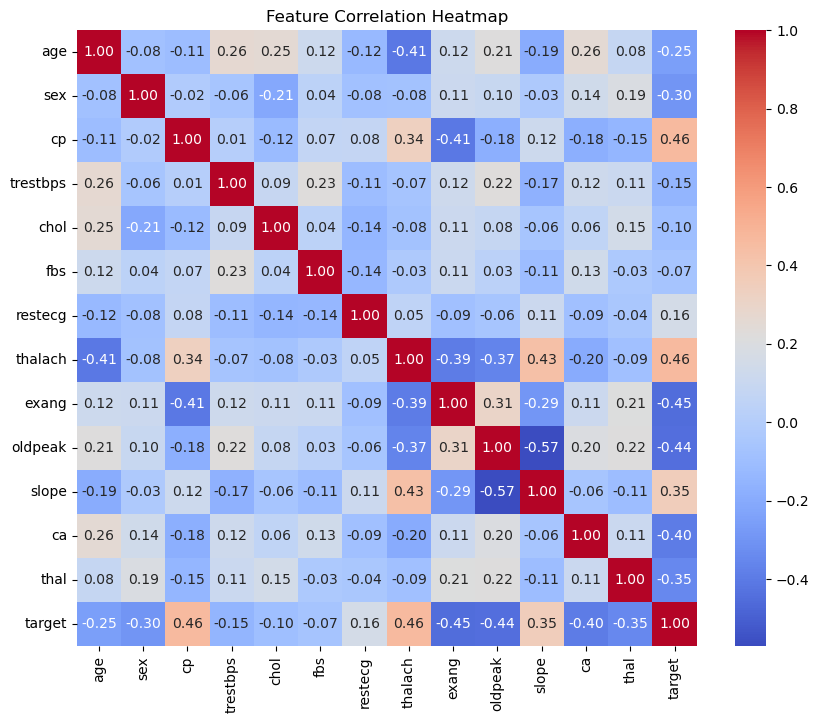

In [39]:

plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Cholesterol vs Max Heart Rate (Scatter Plot)

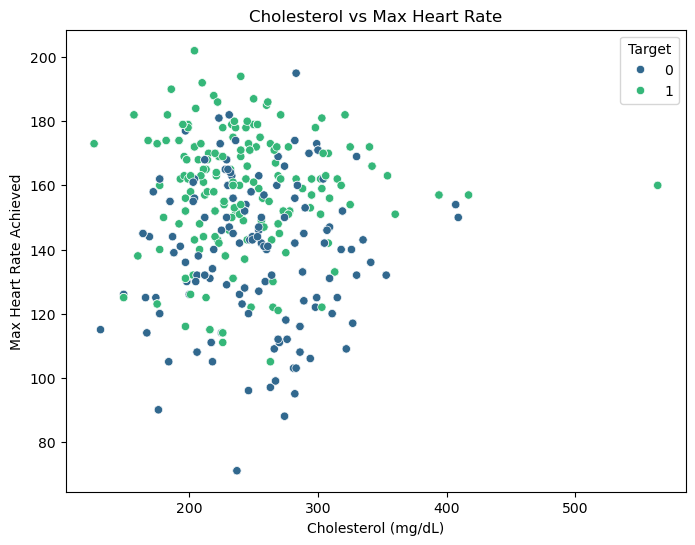

In [40]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='chol', y='thalach', hue='target', palette='viridis', data=df)
plt.title('Cholesterol vs Max Heart Rate')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Max Heart Rate Achieved')
plt.legend(title='Target')
plt.show()

# Split Features and Target Variable

In [67]:
x = df.iloc[:,:-1]

y = df["target"]

# Split Dataset into Train and Test Sets

In [68]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 35)

# Model Training

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
LR = LogisticRegression()      

LR.fit(X_train , y_train)

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Accuracy: Training and Testing Scores

In [71]:
train_score = LR.score(X_train, y_train) * 100
test_score = LR.score(X_test, y_test) * 100

In [72]:
print(f"Train Score: {train_score:.2f}%")
print(f"Test Score: {test_score:.2f}%")

Train Score: 86.92%
Test Score: 85.71%


# Plot training and testing accuracy

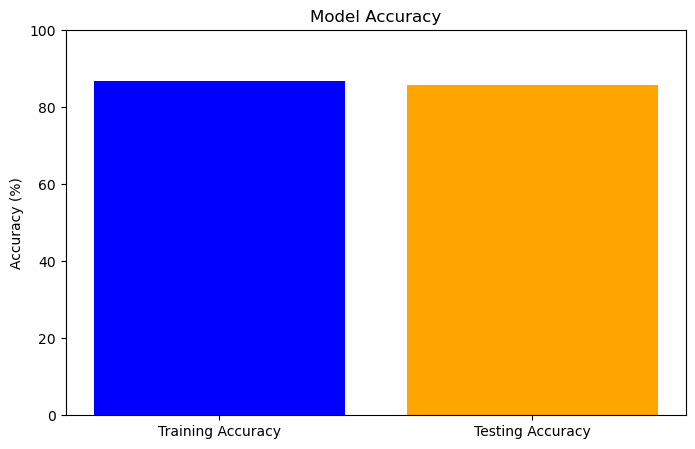

In [73]:
plt.figure(figsize=(8, 5))
bars = ['Training Accuracy', 'Testing Accuracy']
values = [train_score, test_score]

plt.bar(bars, values, color=['blue', 'orange'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim([0, 100])
plt.show()

# Model Error Metrics: MSE and MAE

In [74]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

mse = mean_squared_error(y_test, LR.predict(X_test))
mae = mean_absolute_error(y_test, LR.predict(X_test))

In [75]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 0.14
Mean Absolute Error: 0.14


# Plot MSE and MAE

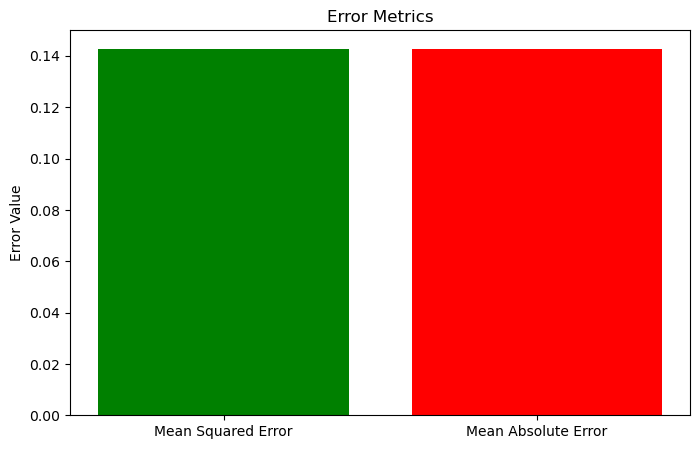

In [76]:
plt.figure(figsize=(8, 5))
error_metrics = ['Mean Squared Error', 'Mean Absolute Error']
values = [mse, mae]

plt.bar(error_metrics, values, color=['green', 'red'])
plt.title('Error Metrics')
plt.ylabel('Error Value')
plt.show()

# if company provide new data how we implement

In [86]:
new_data = pd.DataFrame([[60 , 1 , 0 , 130 , 253 , 0 , 1 , 144 , 1 , 1.4 , 2 , 1 , 3]] , columns=X_train.columns)

In [87]:
prediction = LR.predict(new_data)
print(prediction)

if (prediction[0] == 0):
    print("The patient Does Not have Heart Disease")
else:
    print("The patient has Heart Disease")

[0]
The patient Does Not have Heart Disease


# *Follow GitHub Account @ZeshanFareed*